In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
from   easymore.easymore import easymore
import os
import cftime
import contextily as ctx
import matplotlib
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
matplotlib.rc('font', **font)

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# initializing EASYMORE object
esmr = easymore()

# load the cat and get the lakes
cat = gpd.read_file('../shp/cat_lake_area_corrected_71021602.shp')

cat = cat [cat ['is_lake'] ==1]
cat ['x'] = cat.centroid.x
cat ['y'] = cat.centroid.y

print(cat)


# load the network topology and slice based on the lake type
Ntopo = pd.read_csv('../network_topology/Saskatoon_NTOPO_lake_final.csv')

# get the lake that are Doll
Ntopo_Doll = Ntopo[Ntopo['lake_type_Doll_HYPE_HANASAKI']==1]
cat_Doll = cat [cat['cat_id'].isin(Ntopo_Doll.ID)]
Doll_lake = esmr.make_shape_point(cat_Doll.drop(columns=['geometry']),'x','y')

# get the lake that are Hanasaki
Ntopo_HANASAKI = Ntopo[Ntopo['lake_type_Doll_HYPE_HANASAKI']==2]
cat_HANASAKI = cat [cat['cat_id'].isin(Ntopo_HANASAKI.ID)]
# correct the location of Difenbaker a bit
cat_HANASAKI['x'].iloc[0] = -106.8
cat_HANASAKI['y'].iloc[0] = 51.20
HANASAKI_lake = esmr.make_shape_point(cat_HANASAKI.drop(columns=['geometry']),'x','y')


# get the lake that are HYPE
Ntopo_HYPE = Ntopo[Ntopo['lake_type_Doll_HYPE_HANASAKI']==3]
cat_HYPE = cat [cat['cat_id'].isin(Ntopo_HYPE.ID)]
HYPE_lake = esmr.make_shape_point(cat_HYPE.drop(columns=['geometry']),'x','y')


EASYMORE version 0.0.5 is initiated.
         cat_area  cat_id  is_lake  area_ratio  \
2992  391720000.0     643      1.0         1.0   
2993   79280000.0    7191      1.0         1.0   
2994   86190000.0    7209      1.0         1.0   
2995   42380000.0    7237      1.0         1.0   
2996   12070000.0    7363      1.0         1.0   
...           ...     ...      ...         ...   
3057     230000.0  955266      1.0         1.0   
3058     360000.0  959002      1.0         1.0   
3059     160000.0  966376      1.0         1.0   
3060     120000.0  969862      1.0         1.0   
3061     420000.0  977738      1.0         1.0   

                                               geometry           x          y  
2992  POLYGON ((-106.83760 51.27993, -106.83524 51.2... -107.044380  50.901324  
2993  POLYGON ((-114.02853 52.61698, -114.02617 52.6... -113.999552  52.537312  
2994  POLYGON ((-112.97987 52.53199, -112.98211 52.5... -112.893808  52.483334  
2995  POLYGON ((-114.16141 52.37559, -

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_84272/1131669678.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat ['x'] = cat.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_84272/1131669678.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat ['y'] = cat.centroid.y
/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/shg096/opt/anaconda3

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_84272/3364293136.py:65: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cat.buffer(0.005).plot(ax = axd['bottom'],


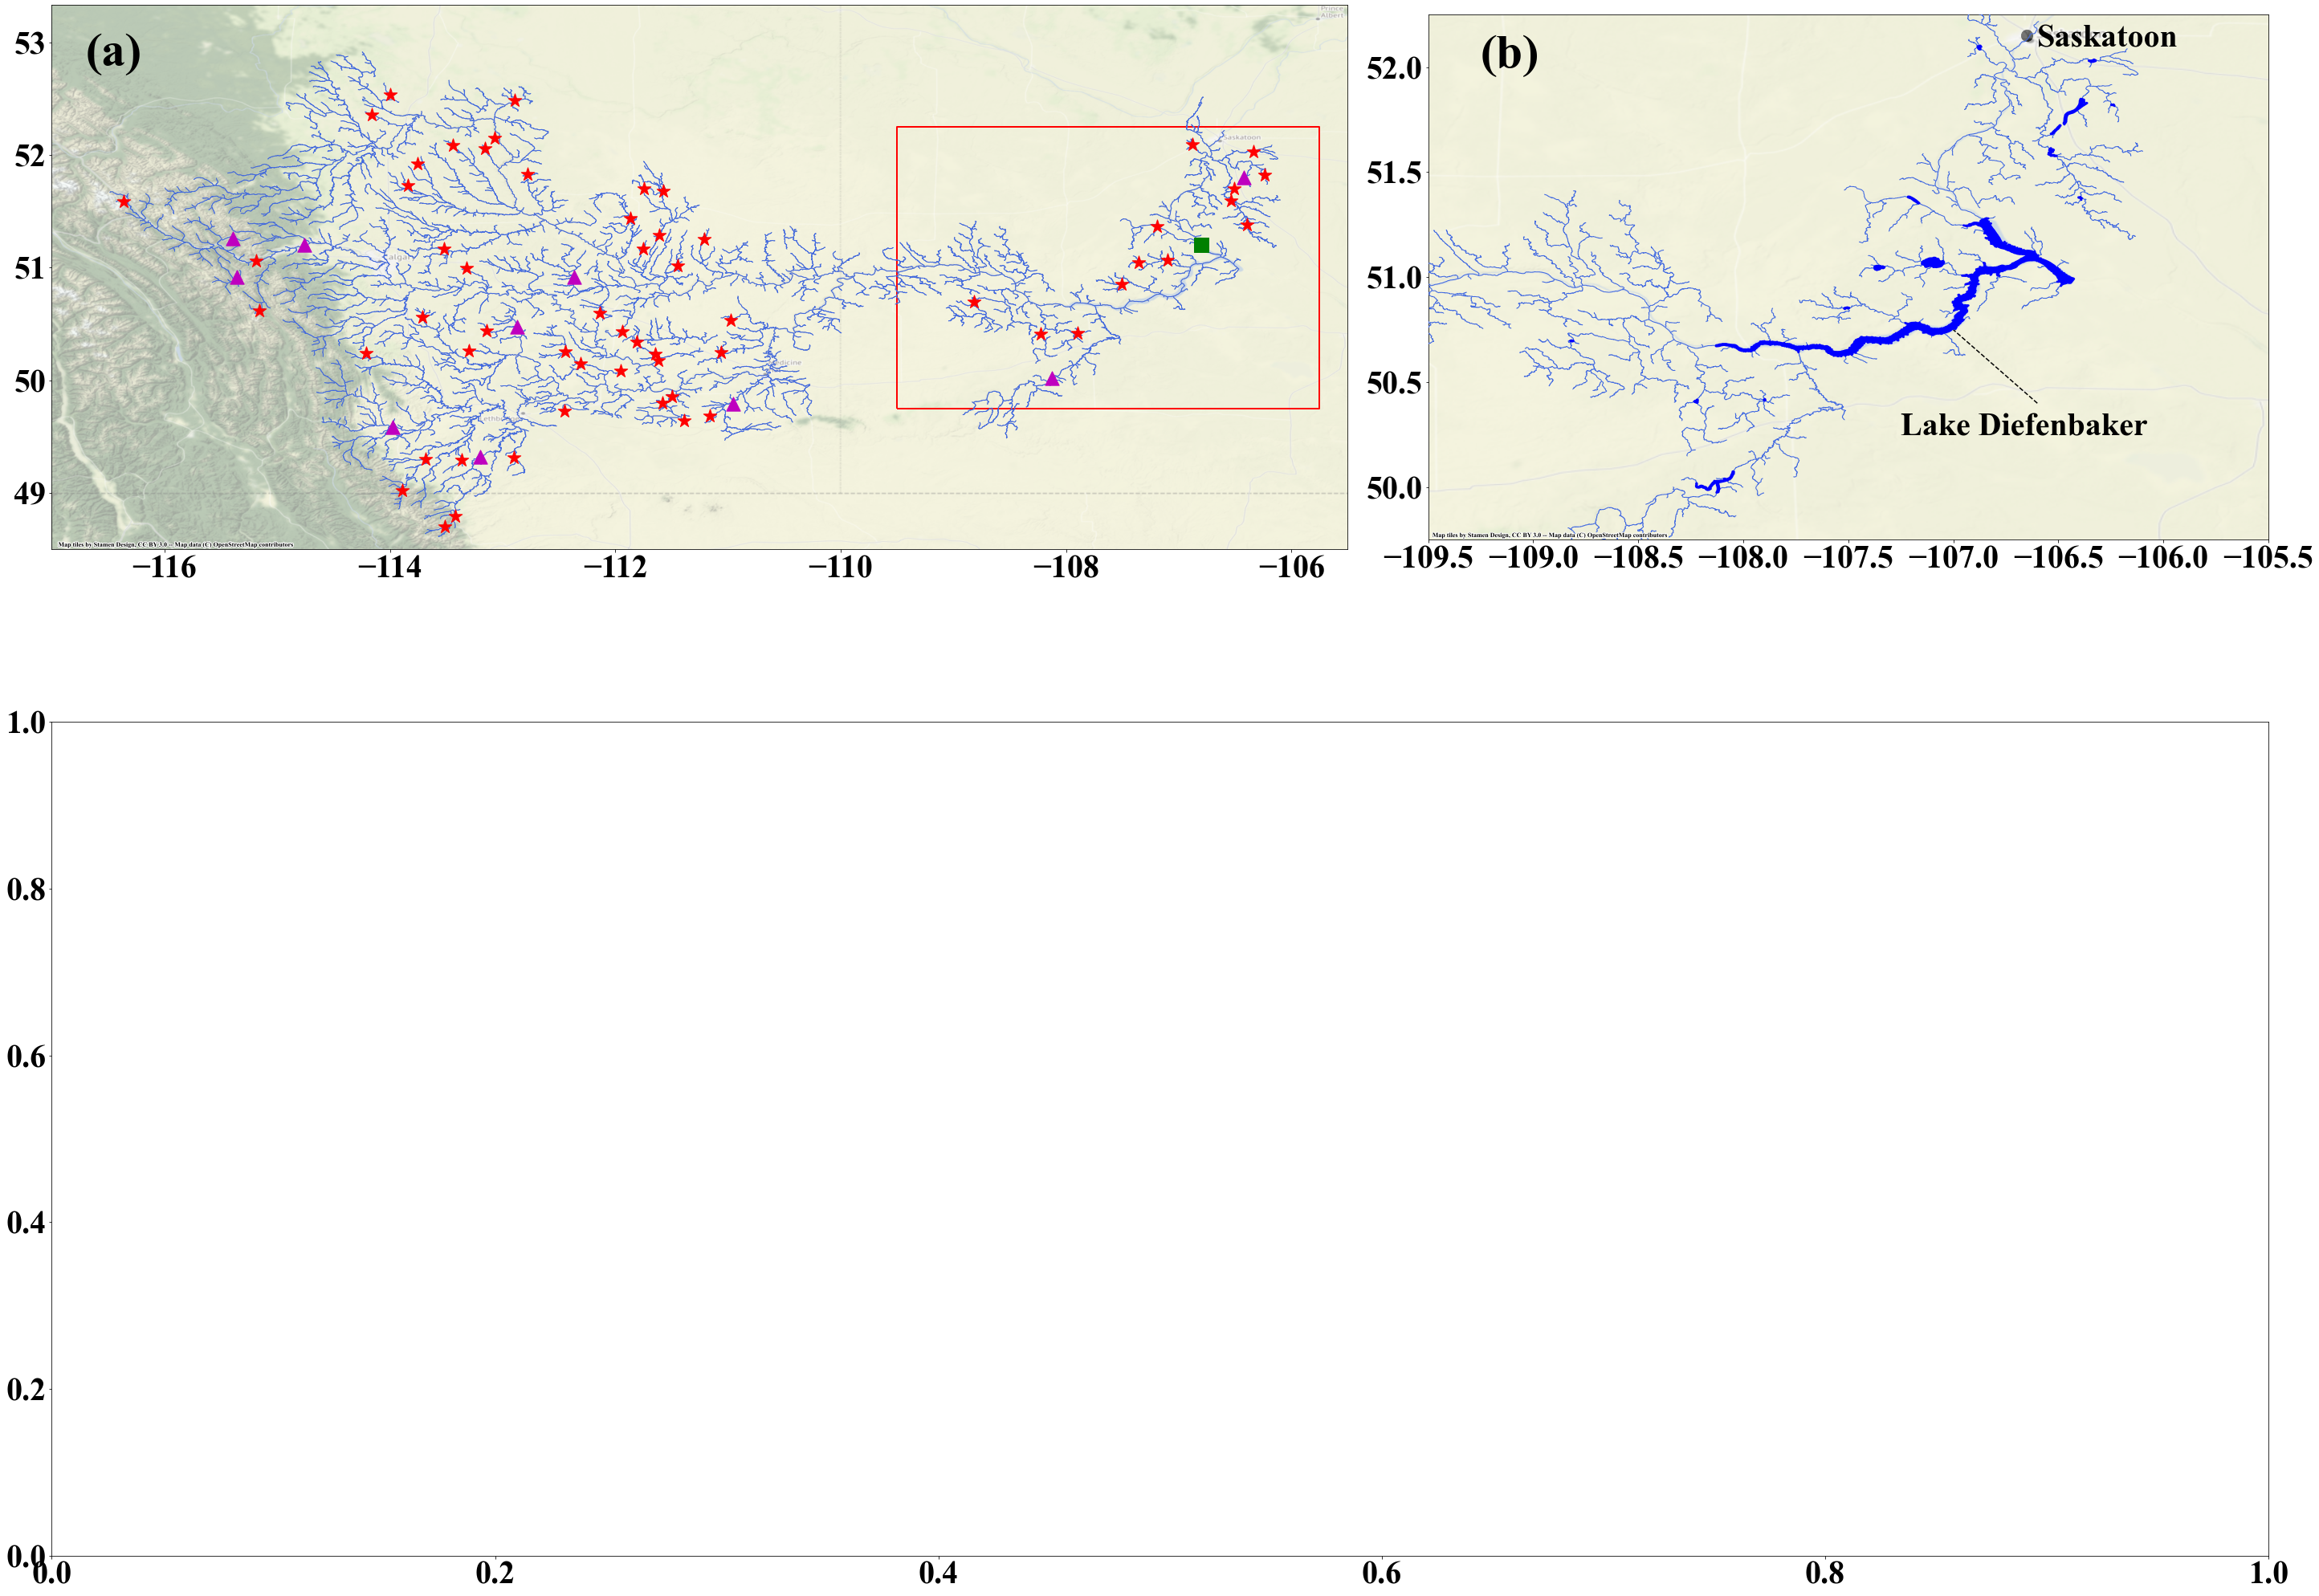

In [3]:
min_lon, min_lat, max_lon, max_lat = -109.5, 49.75, -105.5, 52.25
box = Polygon([[min_lon, min_lat],[min_lon,max_lat],[max_lon,max_lat],[max_lon,min_lat]])
box = gpd.GeoDataFrame(pd.DataFrame(['p1'], columns = ['geometry']),
                       crs = {'init':'epsg:4326'},
                       geometry = [box])
riv = gpd.read_file('../shp/riv_71021602.shp')


fig, axd = plt.subplot_mosaic([['map', 'map', 'map','bottom', 'bottom'],
                              ['d', 'd', 'd','d', 'd']],
                              constrained_layout=True,
                             figsize=(40,30))

axd['map'].set_facecolor('white')
axd['bottom'].set_facecolor('white')
axd['d'].set_facecolor('white')
fig.patch.set_facecolor('white')


## axbig
riv.plot(ax = axd['map'],
         linewidth=.5,
         color = 'grey',
         zorder = 3)

## axbig
riv.plot(ax = axd['map'],
         linewidth=1.0,
         zorder = 3,
         color = 'royalblue')

Doll_lake.plot    (ax=axd['map'], marker='*', color='red',   markersize = 300, zorder = 20, legend=True)
HYPE_lake.plot    (ax=axd['map'], marker='^', color='m',     markersize = 300, zorder = 20, legend=True)
HANASAKI_lake.plot(ax=axd['map'], marker='s', color='green', markersize = 300, zorder = 20, legend=True)

plt.grid()

ctx.add_basemap(axd['map'],
                crs=riv.crs,
                zoom=8,
                alpha = 0.5,
                zorder = 1)

min_lon, min_lat, max_lon, max_lat = -109.5, 49.75, -105.75, 52.25
box = Polygon([[min_lon, min_lat],[min_lon,max_lat],[max_lon,max_lat],[max_lon,min_lat]])
box = gpd.GeoDataFrame(pd.DataFrame(['p1'], columns = ['geometry']),geometry = [box]) # crs = {'init':'epsg:4326'},
# 
box.geometry.boundary.plot(color=None,edgecolor='red',linewidth = 2, ax = axd['map'])


#
axd['map'].axes.set_xlim([-117,-105.5])
axd['map'].axes.set_ylim([48.5,53.33])

# test
axd['map'].text(-116.7, 52.8, '(a)', fontsize = 60)

##
## axbig
riv.plot(ax = axd['bottom'],
         linewidth=1,
         zorder = 3,
         color = 'royalblue')

cat.buffer(0.005).plot(ax = axd['bottom'],
                      linewidth=2,
                      zorder = 3,
                      color = 'blue')


plt.grid()

ctx.add_basemap(axd['bottom'],
                crs=riv.crs,
                zoom=8,
                alpha = 0.5,
                zorder = 1)


axd['bottom'].axes.set_xlim([-109.5,-105.5])
axd['bottom'].axes.set_ylim([49.75,52.25])

# text
axd['bottom'].text(-109.25, 52, '(b)', fontsize = 60)
axd['bottom'].text(-106.6, 52.1, 'Saskatoon', fontsize = 40)
axd['bottom'].text(-107.25, 50.25, 'Lake Diefenbaker', fontsize = 40)
axd['bottom'].plot([-106.6, -107.00],[50.4,50.75],'--k')
axd['bottom'].scatter([-106.65],[52.15],color='black', s = 200)


plt.savefig('../frame/Lake_Difenbaker_network_topology.png', dpi=400)
plt.savefig('../frame/Lake_Difenbaker_network_topology.jpeg', dpi=400)
plt.savefig('../frame/Lake_Difenbaker_network_topology.jpg', dpi=400)
plt.savefig('../frame/Lake_Difenbaker_network_topology.pdf', dpi=400)

